In [0]:
import glob
import pandas as pd
import datetime

In [0]:
# Authenticate google drive access and mount it to /content/drive path.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Check the contents of the Data/ directory.
DATA_PATH_PREFIX = '/content/drive/My Drive/Colab Notebooks/Data'
def get_data_file(file_name):
  return DATA_PATH_PREFIX+'/'+file_name
glob.glob(DATA_PATH_PREFIX + '/*')

['/content/drive/My Drive/Colab Notebooks/Data/workouts.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/workouts.gsheet',
 '/content/drive/My Drive/Colab Notebooks/Data/brezinova.marianna@gmail.com_0_summarizedActivities.json',
 '/content/drive/My Drive/Colab Notebooks/Data/2019-10-19_2020-01-27_81041029_sleepData.json',
 '/content/drive/My Drive/Colab Notebooks/Data/2020-01-27_2020-05-06_81041029_sleepData.json',
 '/content/drive/My Drive/Colab Notebooks/Data/MetricsMaxMetData_20191206_20200315_81041029.json',
 '/content/drive/My Drive/Colab Notebooks/Data/81041029_MenstrualCycles.json',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT',
 '/content/drive/My Drive/Colab Notebooks/Data/HR_cycle.png',
 '/content/drive/My Drive/Colab Notebooks/Data/workouts2.csv']

#**Definitions**

In [0]:
def read_workouts(file):
  data = pd.read_csv(get_data_file(file))
  return data

def append_data(data, file):
  data2 = data.append(pd.read_csv(get_data_file(file)))
  return data2

def cleanup_workouts(data):
  data_clean = data.dropna(axis=1, how='all')
  data_clean = data_clean[["WorkoutType", "WorkoutDay", "DistanceInMeters", "TimeTotalInHours",
                        "HeartRateAverage", "HeartRateMax", "IF", "TSS", "HRZone1Minutes", "HRZone2Minutes",
                        "HRZone3Minutes", "HRZone4Minutes", "HRZone5Minutes"]]
  data_clean = data_clean.rename(columns={"WorkoutType":"Type", "WorkoutDay":"Date", 
                                          "DistanceInMeters":"Distance[km]",
                                          "TimeTotalInHours":"time[h]", "HeartRateAverage":"HR_avg",
                                          "HeartRateMax":"HR_max", "HRZone1Minutes":"Z1[min]",
                                          "HRZone2Minutes":"Z2[min]", "HRZone3Minutes":"Z3[min]",
                                          "HRZone4Minutes":"Z4[min]", "HRZone5Minutes":"Z5[min]"})
  data_clean["Distance[km]"] = data_clean["Distance[km]"].map(lambda x: round(x / 1000, 2))
  return data_clean

def sep_sports(data, sport_type):
  sport = data.loc[data.Type.isin([sport_type])]
  sport = sport.dropna(axis=0, how='any')
  return sport

def pace(data):
  data['Pace'] = data['time[h]']*60 / data['Distance[km]']
  return data

def plotting(data, x, y1, y2):
  data.set_index(x)[y1].plot(figsize=(30,8), legend=True)
  data.set_index(x)[y2].plot(secondary_y=True, figsize=(30,8), legend=True)
  return

def plot_scatter(data, x, y):
  data.plot.scatter(x=x, y=y, figsize=(6,6))
  return

def correlation(data):
  corr = data.corr(method='pearson')
  return corr.style.background_gradient(cmap='coolwarm').set_precision(2)

#**Correlation between average HR and pace from workouts**

,Distance[km],time[h],HR_avg,HR_max,IF,TSS,Z1[min],Z2[min],Z3[min],Z4[min],Z5[min],Pace
Distance[km],1.00,0.96,-0.18,-0.01,-0.26,0.98,-0.03,0.35,0.50,0.21,-0.16,0.32
time[h],0.96,1.00,-0.26,-0.06,-0.42,0.93,0.07,0.38,0.46,0.12,-0.17,0.55
HR_avg,-0.18,-0.26,1.00,0.87,0.79,-0.05,-0.47,0.17,-0.27,0.53,0.33,-0.60
HR_max,-0.01,-0.06,0.87,1.00,0.60,0.11,-0.29,0.16,-0.21,0.55,0.40,-0.40
IF,-0.26,-0.42,0.79,0.60,1.00,-0.12,-0.41,-0.22,-0.04,0.50,0.20,-0.88
TSS,0.98,0.93,-0.05,0.11,-0.12,1.00,-0.10,0.32,0.51,0.32,-0.12,0.21
Z1[min],-0.03,0.07,-0.47,-0.29,-0.41,-0.10,1.00,-0.05,-0.40,-0.31,-0.11,0.39
Z2[min],0.35,0.38,0.17,0.16,-0.22,0.32,-0.05,1.00,-0.47,-0.30,-0.14,0.26
Z3[min],0.50,0.46,-0.27,-0.21,-0.04,0.51,-0.40,-0.47,1.00,0.32,-0.11,0.08
Z4[min],0.21,0.12,0.53,0.55,0.50,0.32,-0.31,-0.30,0.32,1.00,0.10,-0.37


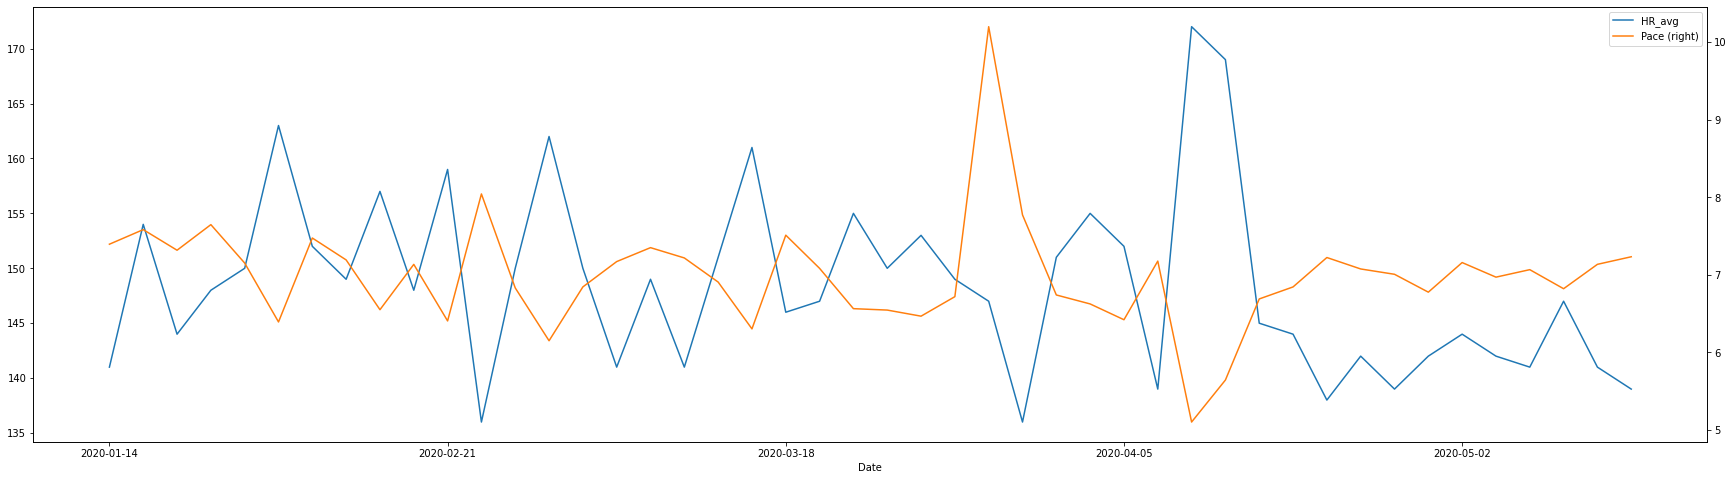

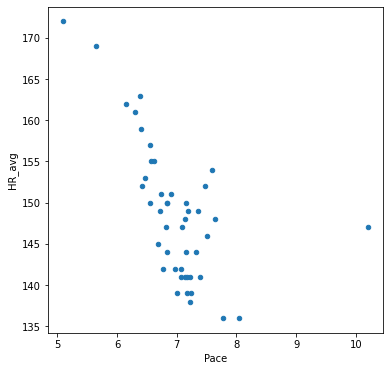

In [0]:
wo = read_workouts('workouts.csv')
wo = append_data(wo, 'workouts2.csv')
wo = cleanup_workouts(wo)
run = sep_sports(wo, 'Run')
run = pace(run)

plotting(run, 'Date', 'HR_avg', 'Pace')
plot_scatter(run, 'Pace', 'HR_avg')
correlation(run)